In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
from datetime import date
from dateutil.relativedelta import relativedelta
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ls "/content/gdrive/MyDrive/Colab Notebooks/MIT Fall 1/Fin Engineering/Final Project"

 2006_1monthvol_final_merged_data.csv   fulldata20072023.xlsx		       SPY_2yrs.xlsx
 2006_6monthvol_final_merged_data.csv   full_data_final_merged_data.csv        SPY.csv
 F-F_Research_Data_Factors_daily.CSV    Full_data_Final_Project.ipynb	       SPY_jan.xlsx
 final_fama_french.csv		        Fulldatafrom2005_Final_Project.ipynb   wrds0022.xlsx
 final_merged_data.csv		        impliedvol_2022_2023.xlsx	       yahoo0022.xlsx
 Final_Project.ipynb		        Metrics_and_Graphs.ipynb	       yahoo20072023.xlsx
 final_results.xlsx		       'Second Final_Project.ipynb'


In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks/MIT Fall 1/Fin Engineering/Final Project

/content/gdrive/MyDrive/Colab Notebooks/MIT Fall 1/Fin Engineering/Final Project


## Data Cleaning

In [ ]:
results = pd.read_excel('final_results.xlsx')

In [ ]:
results.head(6)

,Date,Implied,Historical,Delta,Mu,RF,Sigma Implied,Sigma Historical,Stock Price,Weights_implied,Weights_historical,Results Implied,Results Historical,Rebalanced Implied,Rebalanced Historical,Amount Stock Rebalanced Implied,Amount Stock Rebalanced Historical,VIX
0,2006-01-06,10319.969674,10465.077103,-145.107429,0.10034,0.04284,0.103403,0.100627,91.224693,"[0.5569710787228024, 0.7533527706191878, 0.652...","[0.8640241247401202, 0.8877391287224098, 1.047...","[10000, 9855.32485481836, 9885.50166805169, 99...","[10000, 9834.080939532214, 9860.300006063013, ...",168.316502,197.556493,168.316502,197.556493,11.00
1,2006-02-03,11089.279857,11617.627709,-528.347852,0.10286,0.04536,0.116083,0.103899,89.683434,"[0.7533527706191878, 0.6526859964504071, 0.987...","[0.8877391287224098, 1.0476940559986354, 1.735...","[10000, 10126.576760776941, 10363.65597297188,...","[10000, 10175.518574550502, 10450.14029585951,...",145.136623,239.986755,145.136623,239.986755,12.96
2,2006-03-03,10406.873339,10477.097042,-70.223703,0.09782,0.04032,0.107531,0.103244,91.451920,"[0.6526859964504071, 0.9876736506723321, 0.414...","[1.0476940559986354, 1.7359834371226264, 0.952...","[10000, 10084.066371974051, 10317.17657894221,...","[10000, 10093.068783859657, 10443.219859882976...",121.111374,228.134983,121.111374,228.134983,11.96
3,2006-04-07,10172.656517,10058.535697,114.120820,0.10538,0.04788,0.111453,0.099119,92.371826,"[0.9876736506723321, 0.4147788431241742, 0.370...","[1.7359834371226264, 0.9529989826852383, 0.632...","[10000, 10164.003518196692, 10122.68124796236,...","[10000, 10239.111441719775, 10133.362561395894...",162.752405,210.092567,162.752405,210.092567,12.26
4,2006-05-05,9773.055164,9158.428612,614.626552,0.10790,0.05040,0.100549,0.088037,94.496773,"[0.4147788431241742, 0.37042213679339886, 0.40...","[0.9529989826852383, 0.6326820973935287, 0.560...","[10000, 9738.17238390468, 9596.636532772789, 9...","[10000, 9507.977745864853, 9143.834752200326, ...",131.898448,127.048702,131.898448,127.048702,11.62
5,2006-06-02,11201.673918,10820.966366,380.707551,0.10286,0.04536,0.125429,0.101429,91.986755,"[0.37042213679339886, 0.40437510249182873, 0.9...","[0.6326820973935287, 0.5606915945228409, 0.619...","[10000, 9963.268798506708, 9982.936979673897, ...","[10000, 9866.556552126858, 9870.4844628524, 10...",79.662454,60.947611,79.662454,60.947611,14.32


In [ ]:
results.describe()

,Implied,Historical,Delta,Mu,RF,Sigma Implied,Sigma Historical,Stock Price,Rebalanced Implied,Rebalanced Historical,Amount Stock Rebalanced Implied,Amount Stock Rebalanced Historical,VIX
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,11488.927601,11922.321682,-433.394081,0.067878,0.010378,0.167801,0.168968,182.492768,112.658693,108.044098,112.658693,108.044098,19.440323
std,3139.332132,5970.559692,3406.011278,0.015452,0.015452,0.081541,0.099597,102.230612,167.501599,249.655962,167.501599,249.655962,8.959404
min,9395.006899,8595.520662,-33470.789868,0.057500,0.000000,0.067160,0.064636,51.997894,4.119589,0.318800,4.119589,0.318800,9.140000
25%,10047.445299,9963.323955,-212.677559,0.057500,0.000000,0.112197,0.112474,101.017723,23.891181,10.482811,23.891181,10.482811,13.462500
50%,10532.713401,10379.269383,46.292911,0.060020,0.002520,0.142088,0.135650,157.328430,56.526638,28.111768,56.526638,28.111768,16.585000
75%,11725.244650,11444.784154,364.368937,0.075140,0.017640,0.205443,0.191406,243.886478,120.684465,70.148444,120.684465,70.148444,23.047499
max,35923.146751,69393.936619,4562.480517,0.112940,0.055440,0.545394,0.578774,454.392670,1300.979620,1808.373551,1300.979620,1808.373551,59.930000


In [ ]:
results['Date'] = pd.to_datetime(results['Date'])

In [ ]:
results.set_index('Date', inplace=True)

In [ ]:
non_redundant_results = results.iloc[::5, :]

In [ ]:
non_redundant_results.tail()

,Implied,Historical,Delta,Mu,RF,Sigma Implied,Sigma Historical,Stock Price,Weights_implied,Weights_historical,Results Implied,Results Historical,Rebalanced Implied,Rebalanced Historical,Amount Stock Rebalanced Implied,Amount Stock Rebalanced Historical,VIX
Date,,,,,,,,,,,,,,,,,
2020-09-04,10486.010753,10378.403644,107.607109,0.05750,0.00000,0.235837,0.429492,326.312103,"[0.041999897637540716, 0.07034972746601062, 0....","[0.047141276009124544, 0.0745921140143746, 0.0...","[10000, 9989.362739664344, 10000.375098464217,...","[10000, 9998.019448747596, 10010.390586654197,...",5.583972,4.046693,5.583972,4.046693,30.750000
2021-03-05,13924.951156,12580.256503,1344.694653,0.05750,0.00000,0.195854,0.173520,368.450226,"[0.36648278116458544, 0.4833486443434366, 0.84...","[0.3398867637453758, 0.32889969049104334, 0.32...","[10000, 10091.95656174926, 10481.00520345598, ...","[10000, 10137.489401940225, 10499.932322777626...",37.117562,15.517197,37.117562,15.517197,24.660000
2021-09-03,9784.124878,10225.790839,-441.665961,0.05750,0.00000,0.108552,0.111372,438.005646,"[0.12669568541548748, 0.4928967178219185, 0.05...","[0.6844503497230391, 0.7026649062758709, 0.633...","[10000, 9705.931339725688, 9751.93786368285, 9...","[10000, 9735.273389577505, 9984.566618554902, ...",38.022941,10.560686,38.022941,10.560686,16.410000
2022-02-04,9729.269544,9712.468454,16.801090,0.05750,0.00000,0.197096,0.143033,436.689880,"[0.03397238536050672, 0.18056182214704616, 0.0...","[0.15666045404746357, 0.11724365402656328, 0.0...","[10000, 9968.070626647235, 9972.31748006419, 9...","[10000, 9903.667663877823, 9923.125097714124, ...",8.909505,5.254986,8.909505,5.254986,23.219999
2022-07-01,10171.228596,10144.249214,26.979381,0.06758,0.01008,0.245618,0.252678,373.795990,"[0.11070089729596089, 0.053991342348911335, 0....","[0.04010603983634151, 0.04208692339046946, 0.0...","[10000, 10044.991619817554, 10092.083451361294...","[10000, 10042.018558677126, 10069.833011218998...",5.982689,0.318800,5.982689,0.318800,26.700001


In [ ]:
non_redundant_results['Date'] = pd.to_datetime(non_redundant_results['Date'])

<ipython-input-15-5a23dda026e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_redundant_results['Date'] = pd.to_datetime(non_redundant_results['Date'])


In [ ]:
non_redundant_results.set_index('Date', inplace=True)

In [ ]:
non_redundant_results.iloc[0]['Results Implied']

'[10000, 9855.32485481836, 9885.50166805169, 9987.342117535325, 10234.993827974538, 10319.969674303024]'

## Calculating Sharpe Ratio

In [ ]:
# converting string list to a normal list
def convert_tolist(string_list):
  # Remove brackets and split the string
  string_list = string_list.strip('[]')
  list_elements = string_list.split(', ')

  # Convert string elements to integers (or other types if needed)
  regular_list = [float(element) for element in list_elements]
  return regular_list

In [ ]:
def portfolio_returns(combined_df):
  dates = []
  returns_implied = []
  returns_historical = []
  risk_free_rate = []
  for i in range(0, len(combined_df)):
    new_list_implied = convert_tolist(combined_df.iloc[i]['Results Implied'])
    new_list_historical = convert_tolist(combined_df.iloc[i]['Results Historical'])
    #looping through columns
    for j in range(0, 6):
      if j == 0:
        continue
      else:
        risk_free_rate.append(combined_df.iloc[i]['RF']/12)
        dates.append(combined_df.index[i] + relativedelta(months=j))
        monthly_return_implied = np.log(new_list_implied[j]/new_list_implied[j-1])
        monthly_return_historical = np.log(new_list_historical[j]/new_list_historical[j-1])
        returns_implied.append(monthly_return_implied)
        returns_historical.append(monthly_return_historical)
  portfolio_df = pd.DataFrame({'Implied Returns Monthly': returns_implied, 'Historical Returns Monthly' : returns_historical, 'Monthly Risk Free Rate' : risk_free_rate}, index=dates)
  return portfolio_df

In [ ]:
monthly_returns = portfolio_returns(non_redundant_results)

In [ ]:
monthly_returns.head()

,Implied Returns Monthly,Historical Returns Monthly,Monthly Risk Free Rate
2006-02-06,-0.014573,-0.016731,0.00357
2006-03-06,0.003057,0.002663,0.00357
2006-04-06,0.010249,0.011474,0.00357
2006-05-06,0.024494,0.036707,0.00357
2006-06-06,0.008268,0.011346,0.00357


In [ ]:
monthly_returns['Excess Returns Implied'] = monthly_returns['Implied Returns Monthly'] - monthly_returns['Monthly Risk Free Rate']

In [ ]:
monthly_returns['Excess Returns Historical'] = monthly_returns['Historical Returns Monthly'] - monthly_returns['Monthly Risk Free Rate']

In [ ]:
monthly_returns.head()

,Implied Returns Monthly,Historical Returns Monthly,Monthly Risk Free Rate,Excess Returns Implied,Excess Returns Historical
2006-02-06,-0.014573,-0.016731,0.00357,-0.018143,-0.020301
2006-03-06,0.003057,0.002663,0.00357,-0.000513,-0.000907
2006-04-06,0.010249,0.011474,0.00357,0.006679,0.007904
2006-05-06,0.024494,0.036707,0.00357,0.020924,0.033137
2006-06-06,0.008268,0.011346,0.00357,0.004698,0.007776


In [ ]:
#Mean for Historical
monthly_returns['Excess Returns Historical'].mean() * 12

0.3115531972076905

In [ ]:
#standard deviation for historical
monthly_returns['Historical Returns Monthly'].std() * np.sqrt(12)

0.28701595897572063

In [ ]:
#Mean for Implied
monthly_returns['Excess Returns Implied'].mean() * 12

0.2774942814513413

In [ ]:
#standard deviation for Implied
monthly_returns['Implied Returns Monthly'].std() * np.sqrt(12)

0.20131579788279735

In [ ]:
#Annualized Sharpe Ratio for Historical
(monthly_returns['Excess Returns Historical'].mean()/monthly_returns['Historical Returns Monthly'].std()) * np.sqrt(12)

1.085490849775519

In [ ]:
#Annualized Sharpe Ratio for Implied
(monthly_returns['Excess Returns Implied'].mean()/monthly_returns['Implied Returns Monthly'].std()) * np.sqrt(12)

1.3784029091094665

## T Significance

In [ ]:
monthly_returns.head()

,Implied Returns Monthly,Historical Returns Monthly,Monthly Risk Free Rate,Excess Returns Implied,Excess Returns Historical
2006-02-06,-0.014573,-0.016731,0.00357,-0.018143,-0.020301
2006-03-06,0.003057,0.002663,0.00357,-0.000513,-0.000907
2006-04-06,0.010249,0.011474,0.00357,0.006679,0.007904
2006-05-06,0.024494,0.036707,0.00357,0.020924,0.033137
2006-06-06,0.008268,0.011346,0.00357,0.004698,0.007776


In [ ]:
stats.ttest_ind(monthly_returns['Implied Returns Monthly'], monthly_returns['Historical Returns Monthly'])

TtestResult(statistic=-0.3865717206186334, pvalue=0.6992908130226039, df=378.0)

# Calculating Max Drawdown for Each 6 Month Period

In [ ]:
def drawdown(combined_df):
  initial_value = 10000
  dates = []
  drawdown_implied = []
  drawdown_historical = []
  for i in range(0, len(combined_df)):
    new_list_implied = convert_tolist(combined_df.iloc[i]['Results Implied'])
    new_list_historical = convert_tolist(combined_df.iloc[i]['Results Historical'])
    if min(new_list_implied) == initial_value:
      drawdown = 0
      drawdown_implied.append(drawdown)
      dates.append(combined_df.index[i])
    if min(new_list_implied) < initial_value:
      drawdown = (min(new_list_implied)-initial_value)/initial_value
      drawdown_implied.append(drawdown)
      dates.append(combined_df.index[i])
    if min(new_list_historical) == initial_value:
      drawdown = 0
      drawdown_historical.append(drawdown)
    if min(new_list_historical) < initial_value:
      drawdown = (min(new_list_historical)-initial_value)/initial_value
      drawdown_historical.append(drawdown)
  portfolio_df = pd.DataFrame({'6 Month Drawdown Implied Volatility (%)': drawdown_implied, '6 Month Drawdown Historcial Volatility (%)' : drawdown_historical}, index=dates)
  return portfolio_df

In [ ]:
drawdown_pct = drawdown(results)

In [ ]:
drawdown_pct.describe()

,6 Month Drawdown Implied Volatility (%),6 Month Drawdown Historcial Volatility (%)
count,186.000000,186.000000
mean,-0.007737,-0.013874
std,0.013847,0.030124
min,-0.076028,-0.249664
25%,-0.010418,-0.016228
50%,0.000000,0.000000
75%,0.000000,0.000000
max,0.000000,0.000000


## Weights Over Time

In [ ]:
def portfolio_weights(combined_df):
  dates = []
  sigma_implied = []
  sigma_historical = []
  stock_weights_implied = []
  stock_weights_historical = []
  for i in range(0, len(combined_df)):
    new_list_implied = convert_tolist(combined_df.iloc[i]['Weights_implied'])
    new_list_historical = convert_tolist(combined_df.iloc[i]['Weights_historical'])
    implied_weight = new_list_implied[0]
    historical_weight = new_list_historical[0]
    stock_weights_implied.append(implied_weight)
    stock_weights_historical.append(historical_weight)
    dates.append(combined_df.index[i])
    sigma_implied.append(combined_df.iloc[i]['Sigma Implied'])
    sigma_historical.append(combined_df.iloc[i]['Sigma Historical'])
  portfolio_df = pd.DataFrame({'Weights in Stock for Implied Volatility Strategy': stock_weights_implied, 'Weights in Stock for Historical Volatility Strategy' : stock_weights_historical, 'Sigma of Implied Volatility' : sigma_implied, 'Sigma of Historical Volatility' : sigma_historical}, index=dates)
  return portfolio_df

In [ ]:
weighting = portfolio_weights(results)

In [ ]:
weighting

,Weights in Stock for Implied Volatility Strategy,Weights in Stock for Historical Volatility Strategy,Sigma of Implied Volatility,Sigma of Historical Volatility
2006-01-06,0.556971,0.864024,0.103403,0.100627
2006-02-03,0.753353,0.887739,0.116083,0.103899
2006-03-03,0.652686,1.047694,0.107531,0.103244
2006-04-07,0.987674,1.735983,0.111453,0.099119
2006-05-05,0.414779,0.952999,0.100549,0.088037
...,...,...,...,...
2022-03-04,0.180562,0.117244,0.267057,0.165165
2022-04-01,0.035742,0.067758,0.158514,0.179799
2022-05-06,0.055893,0.051088,0.262574,0.212872
2022-06-03,0.043718,0.040166,0.226493,0.233223


In [ ]:
#convert to %
weighting['Weights in Stock for Implied Volatility Strategy'] = weighting['Weights in Stock for Implied Volatility Strategy'] * 100
weighting['Weights in Stock for Historical Volatility Strategy'] = weighting['Weights in Stock for Historical Volatility Strategy'] * 100

In [ ]:
#convert to %
weighting['Sigma of Implied Volatility'] = weighting['Sigma of Implied Volatility'] * 100
weighting['Sigma of Historical Volatility'] = weighting['Sigma of Historical Volatility'] * 100

# Graphs

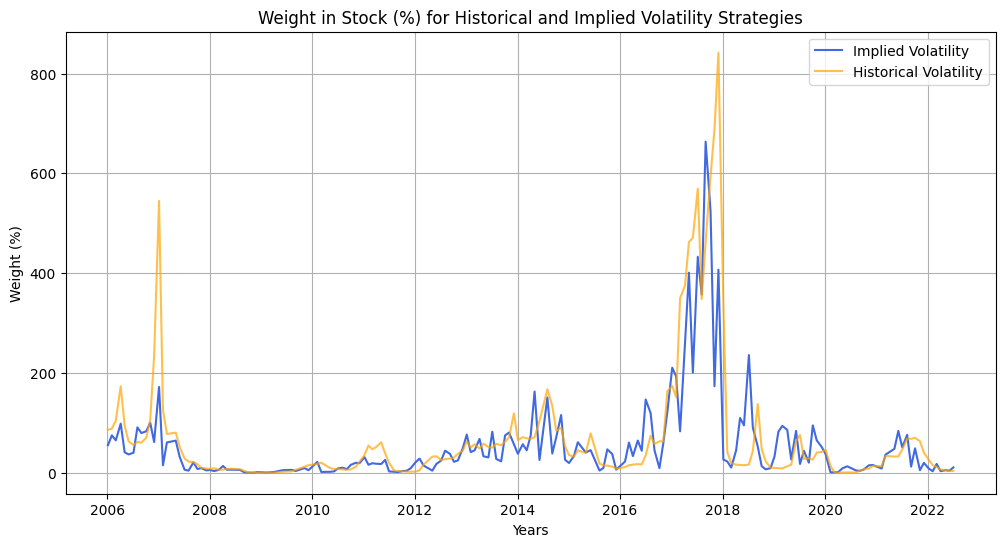

In [ ]:
#weighting graphs
plt.figure(figsize=(12, 6))
plt.plot(weighting['Weights in Stock for Implied Volatility Strategy'], color='royalblue')
plt.plot(weighting['Weights in Stock for Historical Volatility Strategy'], color='orange', alpha = .7)
plt.title('Weight in Stock (%) for Historical and Implied Volatility Strategies')
plt.ylabel('Weight (%)')
plt.xlabel('Years')
plt.legend(["Implied Volatility", "Historical Volatility"], loc ="upper right")
plt.grid(True)

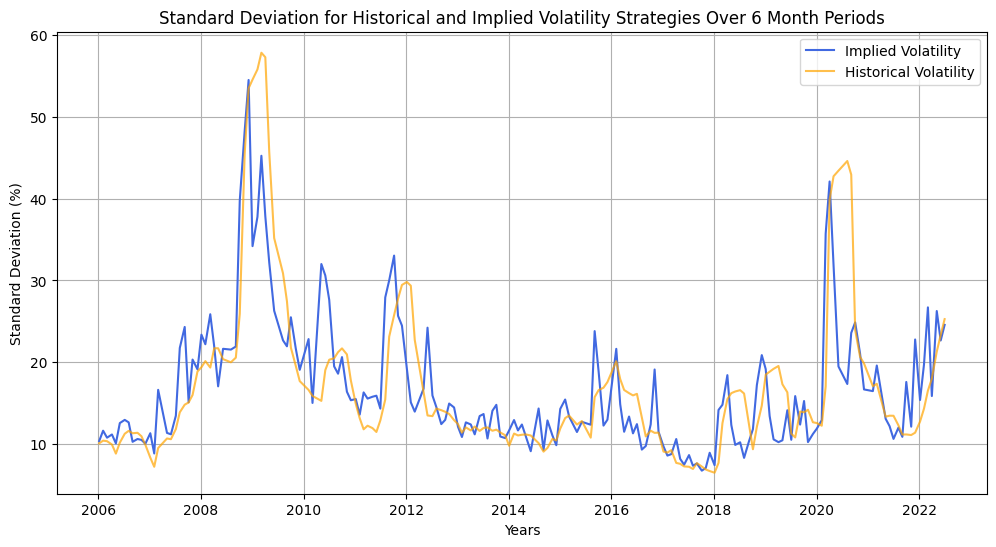

In [ ]:
#Standard Deviation of Different Strategies for 6 month periods
plt.figure(figsize=(12, 6))
plt.plot(weighting['Sigma of Implied Volatility'], color='royalblue')
plt.plot(weighting['Sigma of Historical Volatility'], color='orange', alpha = .7)
plt.title('Standard Deviation for Historical and Implied Volatility Strategies Over 6 Month Periods')
plt.ylabel('Standard Deviation (%)')
plt.xlabel('Years')
plt.legend(["Implied Volatility", "Historical Volatility"], loc ="upper right")
plt.grid(True)

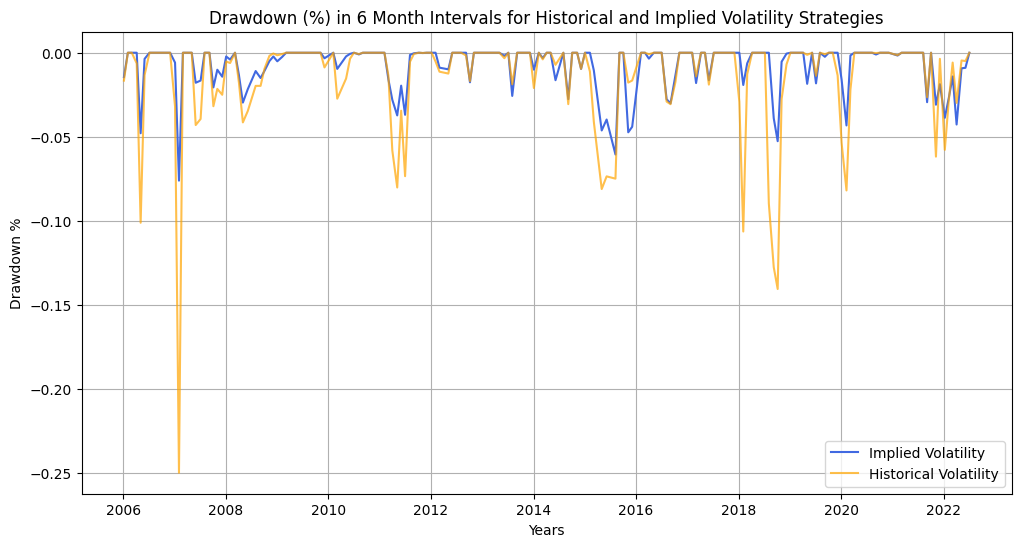

In [ ]:
#drawdown % in 6 month intervals
plt.figure(figsize=(12, 6))
plt.plot(drawdown_pct['6 Month Drawdown Implied Volatility (%)'], color='royalblue')
plt.plot(drawdown_pct['6 Month Drawdown Historcial Volatility (%)'], color='orange', alpha = .7)
plt.title('Drawdown (%) in 6 Month Intervals for Historical and Implied Volatility Strategies')
plt.ylabel('Drawdown %')
plt.xlabel('Years')
plt.legend(["Implied Volatility", "Historical Volatility"], loc ="lower right")
plt.grid(True)

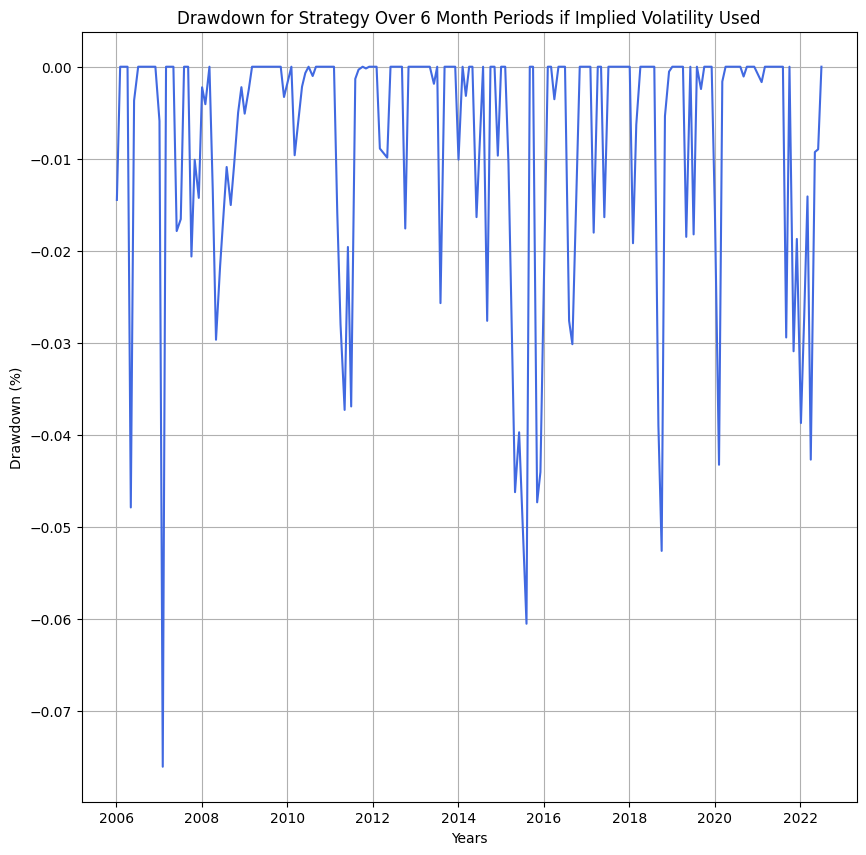

In [ ]:
#drawdown graph
plt.figure(figsize=(10, 10))
plt.plot(drawdown_pct['6 Month Drawdown Implied Volatility (%)'], color='royalblue')
#plt.xticks(rotation=90)
plt.title('Drawdown for Strategy Over 6 Month Periods if Implied Volatility Used')
plt.ylabel('Drawdown (%)')
plt.xlabel('Years')
plt.grid(True)

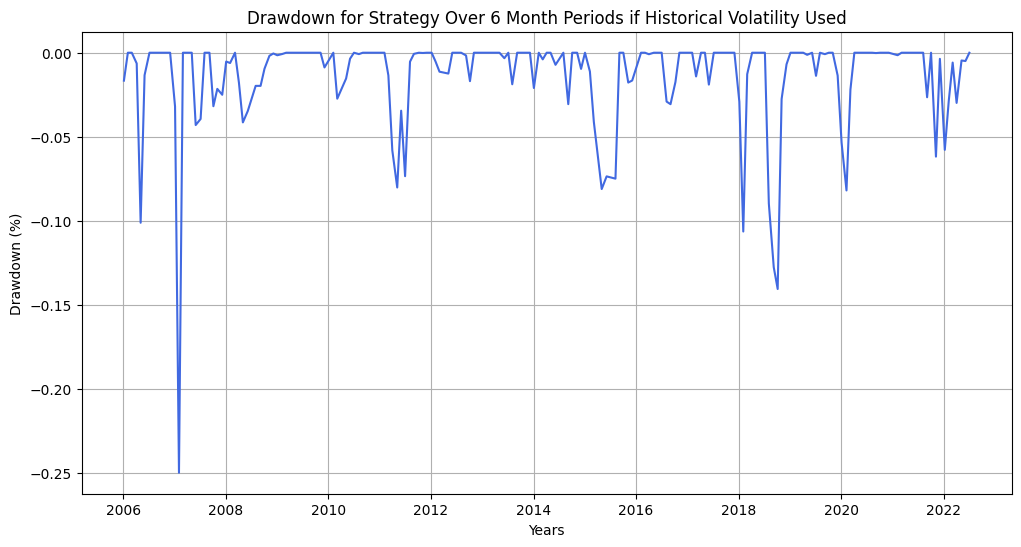

In [ ]:
#drawdown graph
plt.figure(figsize=(12, 6))
plt.plot(drawdown_pct['6 Month Drawdown Historcial Volatility (%)'], color='royalblue')
#plt.xticks(rotation=90)
plt.title('Drawdown for Strategy Over 6 Month Periods if Historical Volatility Used')
plt.ylabel('Drawdown (%)')
plt.xlabel('Years')
plt.grid(True)

In [ ]:
monthly_returns.head()

,Implied Returns Monthly,Historical Returns Monthly,Monthly Risk Free Rate,Excess Returns Implied,Excess Returns Historical
2006-02-06,-0.014573,-0.016731,0.00357,-0.018143,-0.020301
2006-03-06,0.003057,0.002663,0.00357,-0.000513,-0.000907
2006-04-06,0.010249,0.011474,0.00357,0.006679,0.007904
2006-05-06,0.024494,0.036707,0.00357,0.020924,0.033137
2006-06-06,0.008268,0.011346,0.00357,0.004698,0.007776


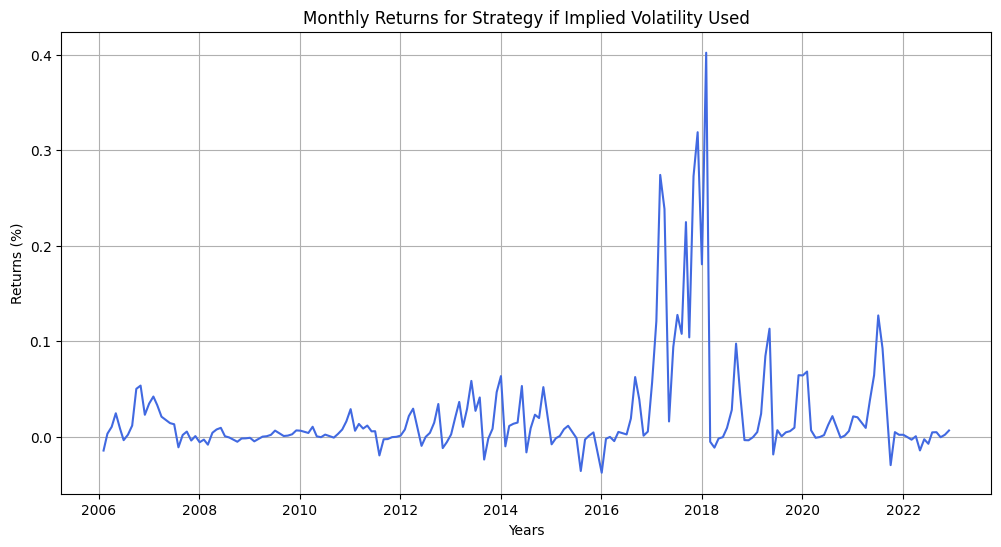

In [ ]:
#monthly returns over time for implied volatility
plt.figure(figsize=(12, 6))
plt.plot(monthly_returns['Implied Returns Monthly'], color='royalblue')
#plt.xticks(rotation=90)
plt.title('Monthly Returns for Strategy if Implied Volatility Used')
plt.ylabel('Returns (%)')
plt.xlabel('Years')
plt.grid(True)

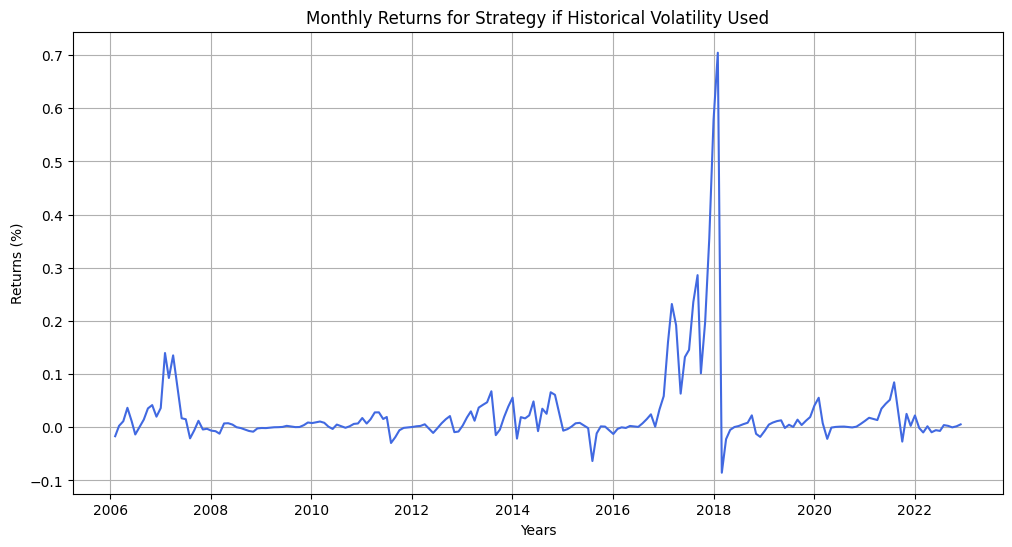

In [ ]:
#monthly returns over time for historical volatility
plt.figure(figsize=(12, 6))
plt.plot(monthly_returns['Historical Returns Monthly'], color='royalblue')
#plt.xticks(rotation=90)
plt.title('Monthly Returns for Strategy if Historical Volatility Used')
plt.ylabel('Returns (%)')
plt.xlabel('Years')
plt.grid(True)

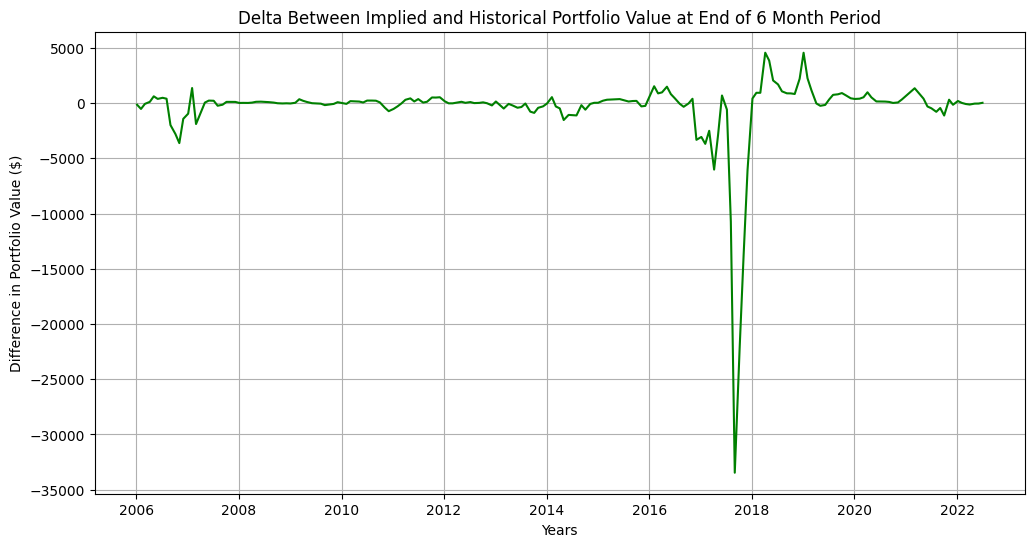

In [ ]:
#delta of portfolio over time
plt.figure(figsize=(12, 6))
plt.plot(results['Delta'], color='green')
#plt.xticks(rotation=90)
plt.title('Delta Between Implied and Historical Portfolio Value at End of 6 Month Period')
plt.ylabel('Difference in Portfolio Value ($)')
plt.xlabel('Years')
plt.grid(True)

In [ ]:
monthly_returns

,Implied Returns Monthly,Historical Returns Monthly,Monthly Risk Free Rate,Excess Returns Implied,Excess Returns Historical
2006-02-06,-0.014573,-0.016731,0.00357,-0.018143,-0.020301
2006-03-06,0.003057,0.002663,0.00357,-0.000513,-0.000907
2006-04-06,0.010249,0.011474,0.00357,0.006679,0.007904
2006-05-06,0.024494,0.036707,0.00357,0.020924,0.033137
2006-06-06,0.008268,0.011346,0.00357,0.004698,0.007776
...,...,...,...,...,...
2022-08-01,0.004489,0.004193,0.00084,0.003649,0.003353
2022-09-01,0.004677,0.002766,0.00084,0.003837,0.001926
2022-10-01,-0.000614,-0.000062,0.00084,-0.001454,-0.000902
2022-11-01,0.001972,0.001896,0.00084,0.001132,0.001056


In [ ]:
# portfolio value if $10,000 invested in 2006 and use startegy until end of 2022
def portfolio_value(returns_df):
  initial_value = 10000
  dates = [pd.to_datetime('2006-01-06')]
  implied_value = [initial_value]
  historical_value = [initial_value]
  for i in range(0, len(returns_df)):
    dates.append(returns_df.index[i])
    new_value_implied = implied_value[-1] * np.exp(returns_df.iloc[i]['Implied Returns Monthly'])
    new_value_historical = historical_value[-1] * np.exp(returns_df.iloc[i]['Historical Returns Monthly'])
    implied_value.append(new_value_implied)
    historical_value.append(new_value_historical)
  portfolio_df = pd.DataFrame({'Portfolio Value Using Implied Volatility ($)': implied_value, 'Portfolio Value Using Historical Volatility ($)' : historical_value}, index=dates)
  return portfolio_df


In [ ]:
portfolio_value_overtime = portfolio_value(monthly_returns)

In [ ]:
portfolio_value_overtime.head()

,Portfolio Value Using Implied Volatility ($),Portfolio Value Using Historical Volatility ($)
2006-01-06,10000.000000,10000.000000
2006-02-06,9855.324855,9834.080940
2006-03-06,9885.501668,9860.300006
2006-04-06,9987.342118,9974.091276
2006-05-06,10234.993828,10347.010249


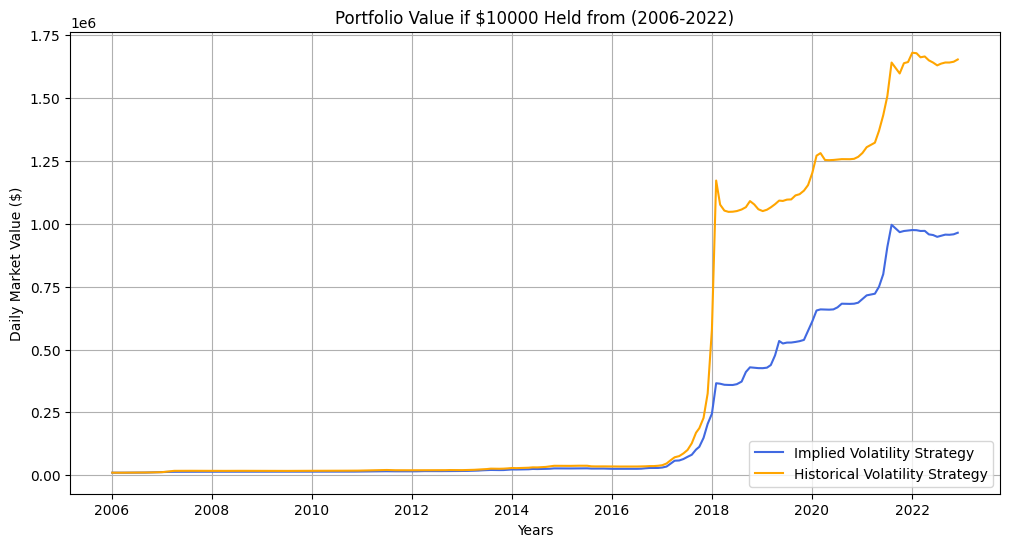

In [ ]:
#portfolio value over time graph
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value_overtime['Portfolio Value Using Implied Volatility ($)'], color='royalblue')
plt.plot(portfolio_value_overtime['Portfolio Value Using Historical Volatility ($)'], color='orange')
plt.title('Portfolio Value if $10000 Held from (2006-2022)')
plt.ylabel('Daily Market Value ($)')
plt.xlabel('Years')
plt.legend(["Implied Volatility Strategy", "Historical Volatility Strategy"], loc ="lower right")
plt.grid(True)

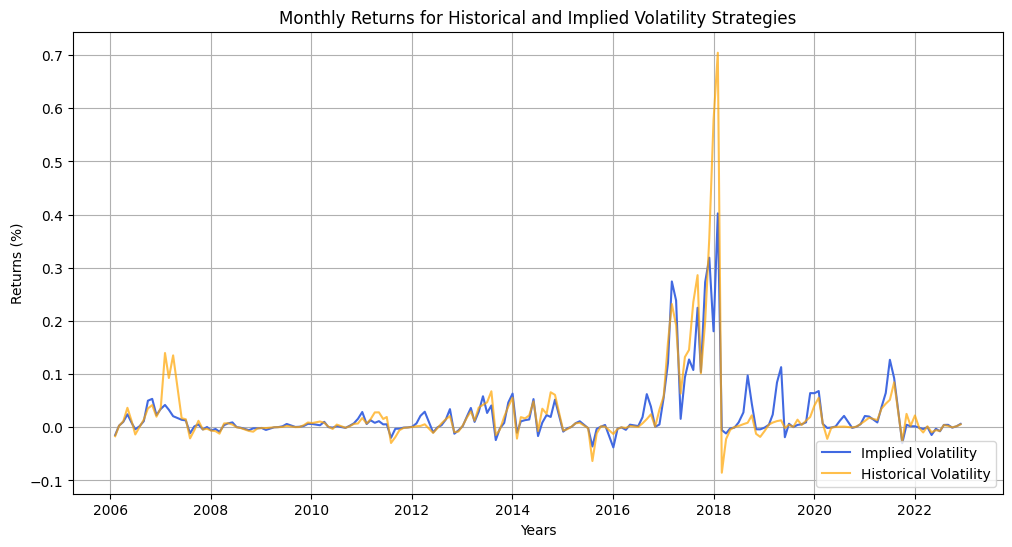

In [ ]:
#monthly returns over time for different strategies
plt.figure(figsize=(12, 6))
plt.plot(monthly_returns['Implied Returns Monthly'], color='royalblue')
plt.plot(monthly_returns['Historical Returns Monthly'], color='orange', alpha = .7)
plt.title('Monthly Returns for Historical and Implied Volatility Strategies')
plt.ylabel('Returns (%)')
plt.xlabel('Years')
plt.legend(["Implied Volatility", "Historical Volatility"], loc ="lower right")
plt.grid(True)